In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info = True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete9KC9FX/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmphq8gomoptfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
class_name =info.features['label'].names
class_name

['cat', 'dog']

In [ ]:
for i, example in enumerate(dataset['train']):
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_name[label])
  os.makedirs(save_dir,exist_ok=True)
  filename = save_dir+ "/"+"{}_{}.jpg".format(class_name[label],i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
dataGen = ImageDataGenerator(rescale=1/255,validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                              zoom_range=0.10, horizontal_flip=True)

train_generator = dataGen.flow_from_directory('/content/cats_vs_dogs/train', target_size=(150,150),
                                              batch_size= 256, class_mode='binary',subset='training')

validation_generator = dataGen.flow_from_directory('/content/cats_vs_dogs/train', target_size=(150,150),
                                              batch_size= 256, class_mode='binary',subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator,epochs=10, validation_data=validation_generator)

Epoch 1/10
73/73 [==============================] - 167s 2s/step - loss: 2.5887 - accuracy: 0.6284 - val_loss: 0.7637 - val_accuracy: 0.5567
Epoch 2/10
73/73 [==============================] - 154s 2s/step - loss: 0.7539 - accuracy: 0.6948 - val_loss: 3.5938 - val_accuracy: 0.5012
Epoch 3/10
73/73 [==============================] - 152s 2s/step - loss: 0.4759 - accuracy: 0.7753 - val_loss: 2.5921 - val_accuracy: 0.5025
Epoch 5/10
73/73 [==============================] - 152s 2s/step - loss: 0.4521 - accuracy: 0.7888 - val_loss: 4.7762 - val_accuracy: 0.5035
Epoch 6/10
73/73 [==============================] - 152s 2s/step - loss: 0.4333 - accuracy: 0.7959 - val_loss: 4.1079 - val_accuracy: 0.5096
Epoch 7/10
73/73 [==============================] - 153s 2s/step - loss: 0.4184 - accuracy: 0.8062 - val_loss: 3.7410 - val_accuracy: 0.5130
Epoch 8/10
73/73 [==============================] - 152s 2s/step - loss: 0.4053 - accuracy: 0.8178 - val_loss: 2.4086 - val_accuracy: 0.5560
Epoch 9/10
73

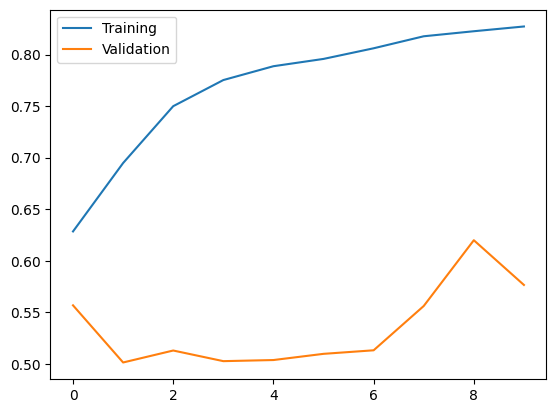

In [ ]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])

In [ ]:
model.save('cats_vs_dogs.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('cats_vs_dogs.h5')


In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

1/1 [==============================] - 0s 19ms/step


'cat'